# In this file I wrote code to plot the defomation over the cardiac cycle for datasets for 4 different pathologies

The first issue is that I do not have the same number of time steps imaged for all data sets. 

In [39]:
#importing libraries
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [ ]:
def volume_plotting(time_norm, vol_array, mean_vol, std_vol,pathology_title, bp_bool = True, savepath = None):
    # Create figure with appropriate size and spacing
    fig, ax = plt.subplots(figsize=(10, 6), dpi=100)

    # Define the exact same modern color palette
    colors = {
        'no_top': '#118ab2ff',      # Modern blue
        'all_slices': '#ef476fff',  # JAHA red
        'offset': "#06d6a0ff",      # matching green that also colorblind people can differentiate
        'ground_truth': "#073b4cff", # black
        'volume_mesh': "#a3a3a3"   # grey
    }

    if myo_bool:
        color_plot = colors['all_slices']
    else: 
        color_plot = colors['no_top']

    # Plot individual curves with matching styling
    for v in vol_array:
        ax.plot(time_norm * 100, v, 
                color=colors['volume_mesh'], linewidth=1, 
                alpha=0.3, zorder=1)

    # Plot mean volume line with scatter points (matching your reference style)
    line1 = ax.plot(time_norm * 100, mean_vol,
                    color=color_plot, linewidth=2.5,
                    label="Mean Volume", alpha=0.6, zorder=3)
    scatter1 = ax.scatter(time_norm * 100, mean_vol,
                        color=color_plot, s=50, alpha=0.5, 
                        linewidth=1, zorder=4)

    # Enhanced confidence interval matching your style
    ax.fill_between(time_norm * 100, mean_vol - std_vol, mean_vol + std_vol, 
                    color=color_plot, alpha=0.2, 
                    label='±1 Standard Deviation', zorder=2)

    # Beautiful labels and title with better sizing (matching your style exactly)
    ax.set_xlabel('Percentage of Cardiac Cycle [%]', fontsize=16, fontweight='bold', color='#000000')
    ax.set_ylabel('Volume [ml]', fontsize=16, fontweight='bold', color='#000000')
    ax.set_title(f'{pathology_title}', fontsize=18, fontweight='bold',
                color='#000000', pad=15)

    # Improve tick styling (matching your reference)
    ax.tick_params(axis='both', which='major', labelsize=11, colors='#000000')

    # Remove grid and clean up spines (exactly like your reference)
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#000000')
    ax.spines['bottom'].set_color('#000000')

    # Beautiful legend with better positioning - no border (matching your style)
    legend = ax.legend(loc='best', frameon=False, fontsize=11, title_fontsize=12)
    legend.get_title().set_fontweight('bold')

    # Add clean white background (matching your reference)
    ax.set_facecolor('#FFFFFF')

    # Use sumyolots_adjust for better control over spacing (exactly like your reference)
    plt.sumyolots_adjust(left=0.1, bottom=0.1, right=0.95, top=0.9)
    
    if savepath:
        plt.savefig(savepath, dpi = 300)

    plt.show()

In [41]:
#Lists of the names of the data sets of the 4 different pathologies

#datasets_healthy = ['SCD0003701','SCD0003801','SCD0003901','SCD0004001','SCD0004101','SCD0004201','SCD0004301','SCD0004401','SCD0004501']
#Leave out 'SCD0003901', because about 50% of the time frames are corrupted and thus I had to cut them out
datasets_healthy = ['SCD0003701','SCD0003801','SCD0004001','SCD0004101','SCD0004201','SCD0004301','SCD0004401','SCD0004501']
datasets_failure_infarct = ['SCD0000101','SCD0000201','SCD0000301','SCD0000401','SCD0000501','SCD0000601', 'SCD0000701','SCD0000801','SCD0000901','SCD0001001','SCD0001101','SCD0001201']
datasets_failure = ['SCD0001301','SCD0001401','SCD0001501','SCD0001601','SCD0001701','SCD0001801','SCD0001901','SCD0002001','SCD0002101','SCD0002201','SCD0002301','SCD0002401']
datasets_Lv = ['SCD0002501','SCD0002601','SCD0002701','SCD0002801','SCD0002901','SCD0003001','SCD0003101','SCD0003201','SCD0003301','SCD0003401','SCD0003501','SCD0003601']

# Healthy Pathologies

In [42]:
#import datasets containing volumes for the datasets in the list of one pathology

volume_dfs = []
for dataset in datasets_healthy:
    file_path = f"/data.lfpn/ibraun/Code/paper_volume_calculation/outputs_patient_data/final_results/{dataset}/mesh_analysis_data/mesh_volumes_cal.csv"
    df = pd.read_csv(file_path)
    volume_dfs.append(df)

In [ ]:
# i need to interpolate the time stps to common time basis

# Normalized time base (0% to 100% cardiac cycle with 20 points)
time_norm = np.linspace(0, 1, 20)

# Interpolated volumes will be stored here
interpolated_volumes = []

for df in volume_dfs:
    volumes = df['bp_volume'].values
    n = len(volumes)
    time_original = np.linspace(0, 1, n)  # Normalize time for this subject
    f_interp = interp1d(time_original, volumes, kind='linear') #linear interpolation
    volumes_interp = f_interp(time_norm)
    interpolated_volumes.append(volumes_interp)

In [ ]:
# Stack into array: shape (9, 100)
vol_array = np.vstack(interpolated_volumes)

# Compute mean and std across subjects
mean_vol_healthy_bp = np.mean(vol_array, axis=0)
std_vol_healthy_bp = np.std(vol_array, axis=0)

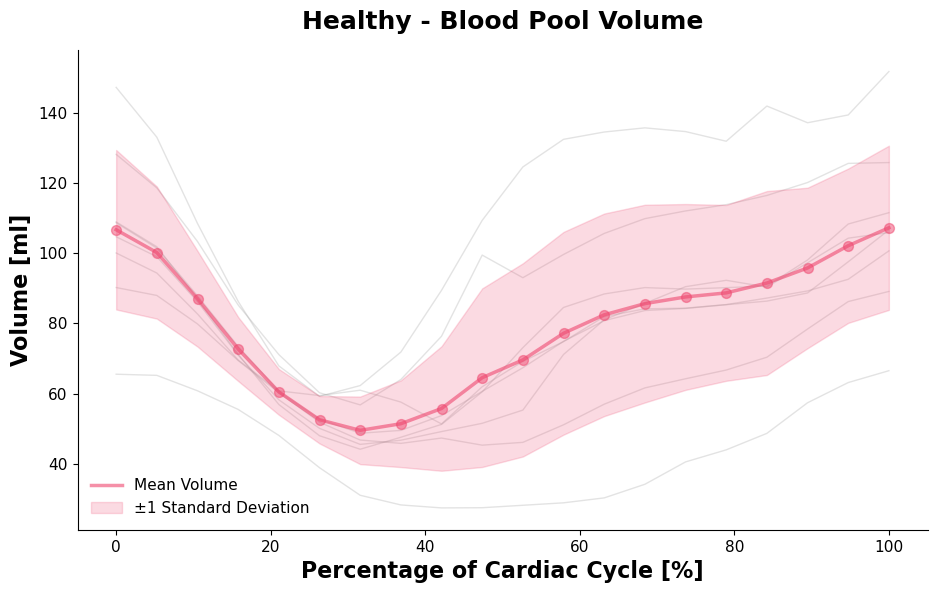

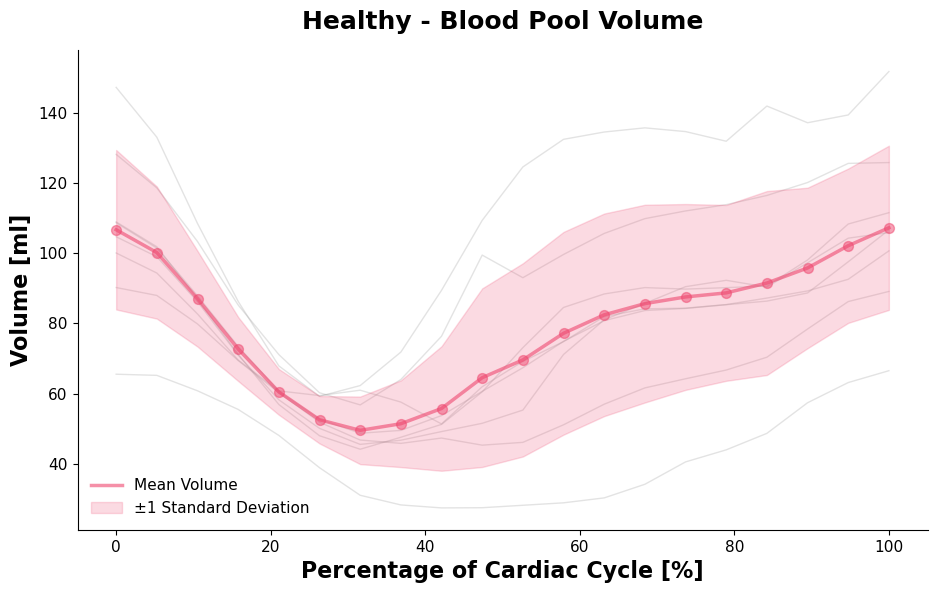

In [ ]:
pathology_title = "Healthy - Blood Pool Volume"
save_path = "/data.lfpn/ibraun/Code/paper_volume_calculation/Plotting/Generated_Plots/Deformation_cardiac_cycle/Blood_Pool/deform_BP_healthy.svg"
volume_plotting(time_norm, vol_array, mean_vol_healthy_bp, std_vol_healthy_bp, pathology_title, save_path)

save_path = "/data.lfpn/ibraun/Code/paper_volume_calculation/Plotting/Generated_Plots/Deformation_cardiac_cycle/Blood_Pool/deform_BP_healthy.pdf"
volume_plotting(time_norm, vol_array, mean_vol_bp, std_vol_bp, pathology_title, save_path)

In [46]:
# i need to interpolate the time stps to common time basis

# Normalized time base (0% to 100% cardiac cycle with 20 points)
time_norm = np.linspace(0, 1, 20)

# Interpolated volumes will be stored here
interpolated_volumes = []

for df in volume_dfs:
    volumes = df['myo_volume'].values
    n = len(volumes)
    time_original = np.linspace(0, 1, n)  # Normalize time for this subject
    f_interp = interp1d(time_original, volumes, kind='linear') #linear interpolation
    volumes_interp = f_interp(time_norm)
    interpolated_volumes.append(volumes_interp)

# Stack into array: shape (9, 100)
vol_array = np.vstack(interpolated_volumes)

# Compute mean and std across subjects
mean_vol_healthy_myo = np.mean(vol_array, axis=0)
std_vol_healthy_myo = np.std(vol_array, axis=0)

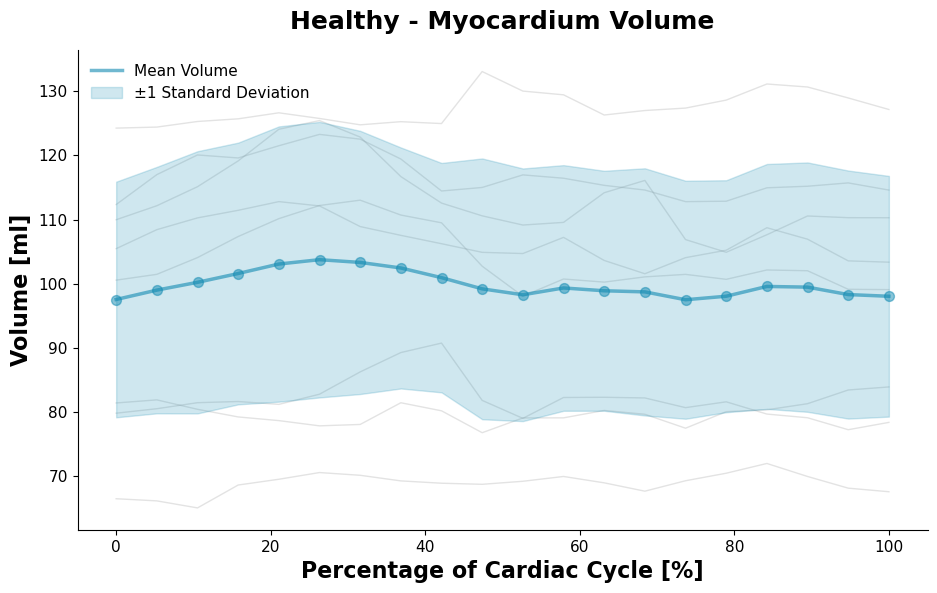

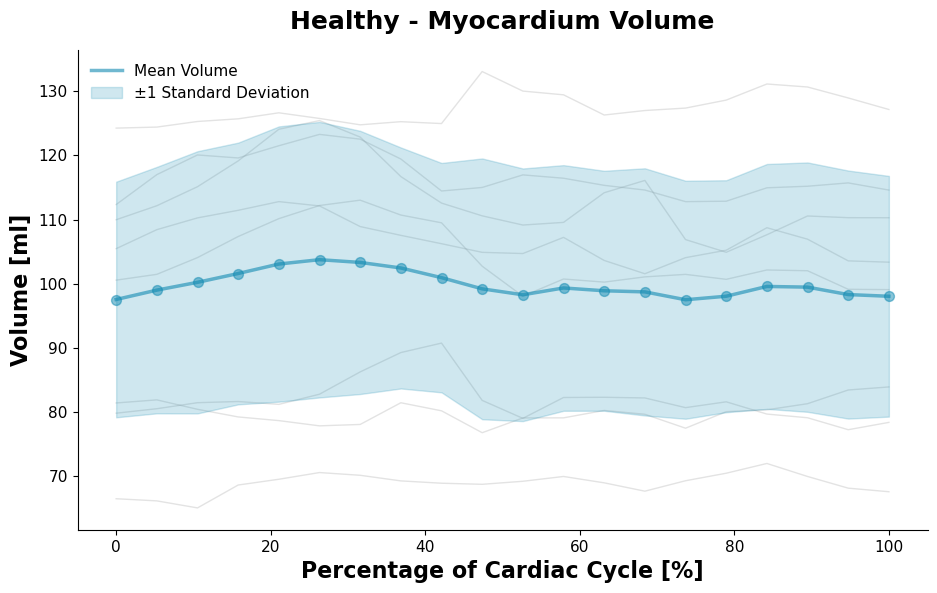

In [47]:
pathology_title = "Healthy - Myocardium Volume"
save_path = "/data.lfpn/ibraun/Code/paper_volume_calculation/Plotting/Generated_Plots/Deformation_cardiac_cycle/Myocardium/deform_MYO_healthy.svg"
volume_plotting(time_norm, vol_array, mean_vol_healthy_myo, std_vol_healthy_myo, pathology_title, bp_bool = False, savepath = save_path)

save_path = "/data.lfpn/ibraun/Code/paper_volume_calculation/Plotting/Generated_Plots/Deformation_cardiac_cycle/Myocardium/deform_MYO_healthy.pdf"
volume_plotting(time_norm, vol_array, mean_vol_healthy_myo, std_vol_healthy_myo, pathology_title, bp_bool = False, savepath = save_path)

# Pathology with Heart Failure and Infarct

In [48]:
#import datasets containing volumes for the datasets in the list of one pathology

volume_dfs = []
for dataset in datasets_failure_infarct:
    try:
        file_path = f"/data.lfpn/ibraun/Code/paper_volume_calculation/outputs_patient_data/final_results/{dataset}/mesh_analysis_data/mesh_volumes_cal.csv"
        df = pd.read_csv(file_path)
        volume_dfs.append(df)
    except Exception as e:
        print(f"Error in Dataset {dataset}: {e}")

In [49]:
# i need to interpolate the time stps to common time basis

# Normalized time base (0% to 100% cardiac cycle with 20 points)
time_norm = np.linspace(0, 1, 20)

# Interpolated volumes will be stored here
interpolated_volumes = []

for df in volume_dfs:
    volumes = df['bp_volume'].values
    n = len(volumes)
    time_original = np.linspace(0, 1, n)  # Normalize time for this subject
    f_interp = interp1d(time_original, volumes, kind='linear') #linear interpolation
    volumes_interp = f_interp(time_norm)
    interpolated_volumes.append(volumes_interp)
    
# Stack into array: shape (9, 100)
vol_array = np.vstack(interpolated_volumes)

# Compute mean and std across subjects
mean_vol_failure_infarct_bp = np.mean(vol_array, axis=0)
std_vol_failure_infarct_bp = np.std(vol_array, axis=0)

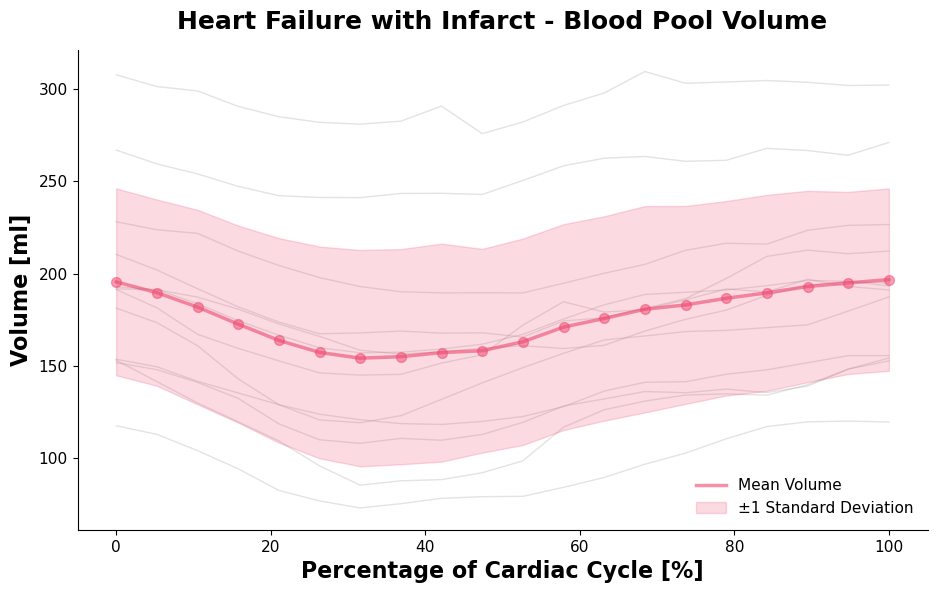

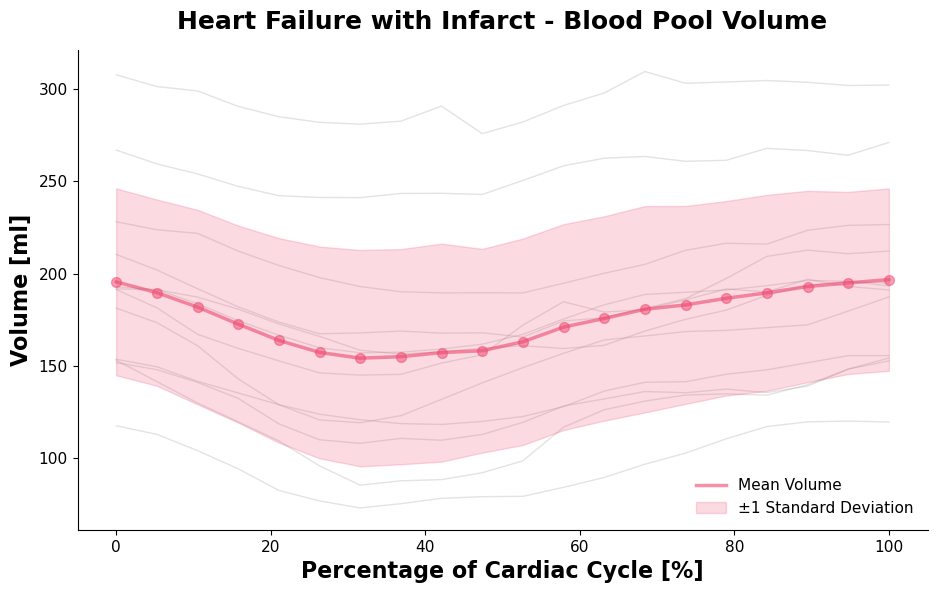

In [50]:
pathology_title = "Heart Failure with Infarct - Blood Pool Volume"
save_path = "/data.lfpn/ibraun/Code/paper_volume_calculation/Plotting/Generated_Plots/Deformation_cardiac_cycle/Blood_Pool/deform_BP_heart_failure_infarct.svg"
volume_plotting(time_norm, vol_array, mean_vol_failure_infarct_bp, std_vol_failure_infarct_bp , pathology_title, save_path)

save_path = "/data.lfpn/ibraun/Code/paper_volume_calculation/Plotting/Generated_Plots/Deformation_cardiac_cycle/Blood_Pool/deform_BP_heart_failure_infarct.pdf"
volume_plotting(time_norm, vol_array, mean_vol_failure_infarct_bp, std_vol_failure_infarct_bp , pathology_title, save_path)

In [51]:
# i need to interpolate the time stps to common time basis

# Normalized time base (0% to 100% cardiac cycle with 20 points)
time_norm = np.linspace(0, 1, 20)

# Interpolated volumes will be stored here
interpolated_volumes = []

for df in volume_dfs:
    volumes = df['myo_volume'].values
    n = len(volumes)
    time_original = np.linspace(0, 1, n)  # Normalize time for this subject
    f_interp = interp1d(time_original, volumes, kind='linear') #linear interpolation
    volumes_interp = f_interp(time_norm)
    interpolated_volumes.append(volumes_interp)

# Stack into array: shape (9, 100)
vol_array = np.vstack(interpolated_volumes)

# Compute mean and std across subjects
mean_vol_failure_infarct_myo = np.mean(vol_array, axis=0)
std_vol_failure_infarct_myo = np.std(vol_array, axis=0)

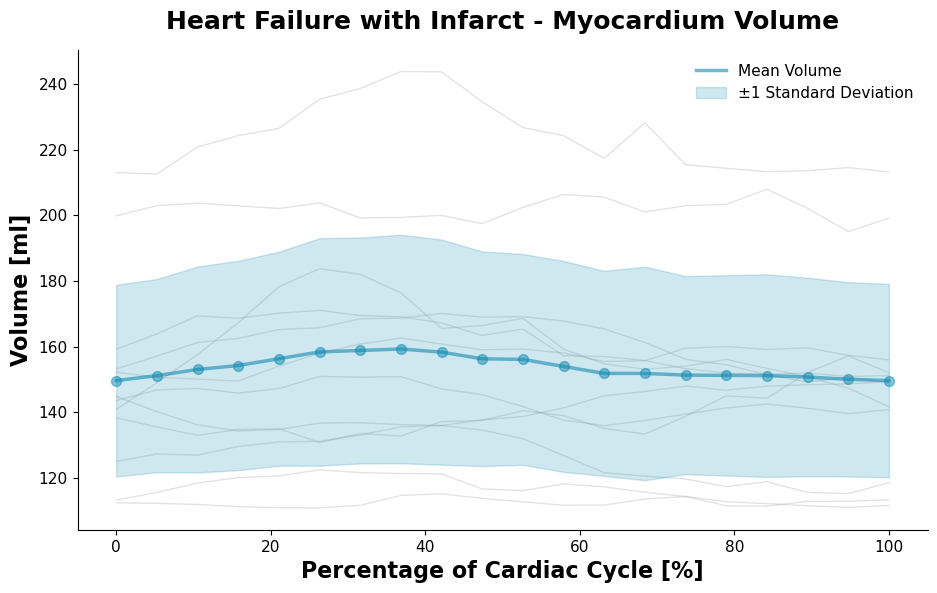

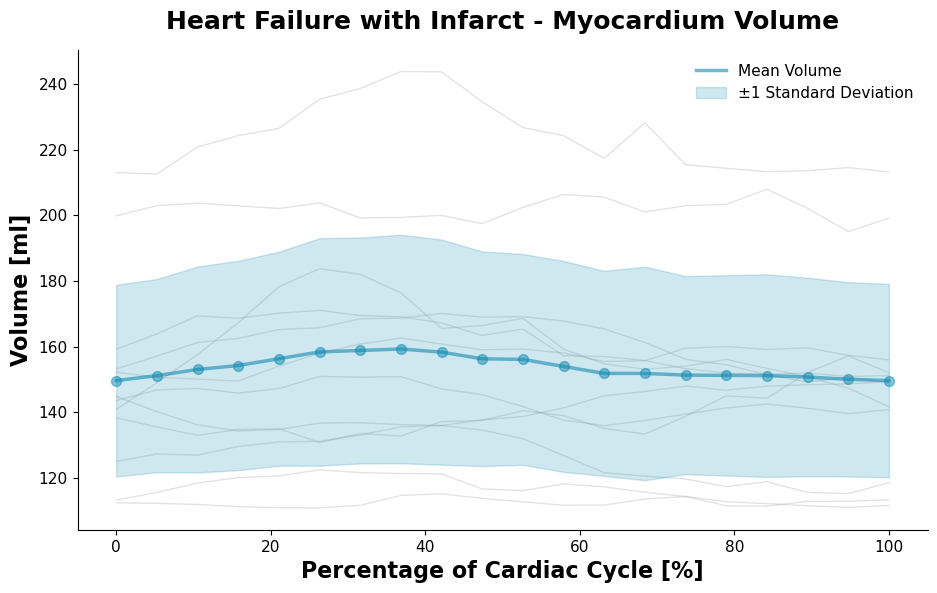

In [52]:
pathology_title = "Heart Failure with Infarct - Myocardium Volume"
save_path = "/data.lfpn/ibraun/Code/paper_volume_calculation/Plotting/Generated_Plots/Deformation_cardiac_cycle/Myocardium/deform_MYO_heart_failure_infarct.svg"
volume_plotting(time_norm, vol_array, mean_vol_failure_infarct_myo, std_vol_failure_infarct_myo, pathology_title, bp_bool = False, savepath = save_path)
save_path = "/data.lfpn/ibraun/Code/paper_volume_calculation/Plotting/Generated_Plots/Deformation_cardiac_cycle/Myocardium/deform_MYO_heart_failure_infarct.pdf"
volume_plotting(time_norm, vol_array, mean_vol_failure_infarct_myo, std_vol_failure_infarct_myo, pathology_title, bp_bool = False, savepath = save_path)

# Pathology with Heart Failure without Infarct

In [53]:
#import datasets containing volumes for the datasets in the list of one pathology

volume_dfs = []
for dataset in datasets_failure:
    try:
        file_path = f"/data.lfpn/ibraun/Code/paper_volume_calculation/outputs_patient_data/final_results/{dataset}/mesh_analysis_data/mesh_volumes_cal.csv"
        df = pd.read_csv(file_path)
        volume_dfs.append(df)
    except Exception as e:
        print(f"Error in Dataset {dataset}: {e}")

In [54]:
# i need to interpolate the time stps to common time basis

# Normalized time base (0% to 100% cardiac cycle with 20 points)
time_norm = np.linspace(0, 1, 20)

# Interpolated volumes will be stored here
interpolated_volumes = []

for df in volume_dfs:
    volumes = df['bp_volume'].values
    n = len(volumes)
    time_original = np.linspace(0, 1, n)  # Normalize time for this subject
    f_interp = interp1d(time_original, volumes, kind='linear') #linear interpolation
    volumes_interp = f_interp(time_norm)
    interpolated_volumes.append(volumes_interp)
    
# Stack into array: shape (9, 100)
vol_array = np.vstack(interpolated_volumes)

# Compute mean and std across subjects
mean_vol_failure_bp = np.mean(vol_array, axis=0)
std_vol_failure_bp = np.std(vol_array, axis=0)

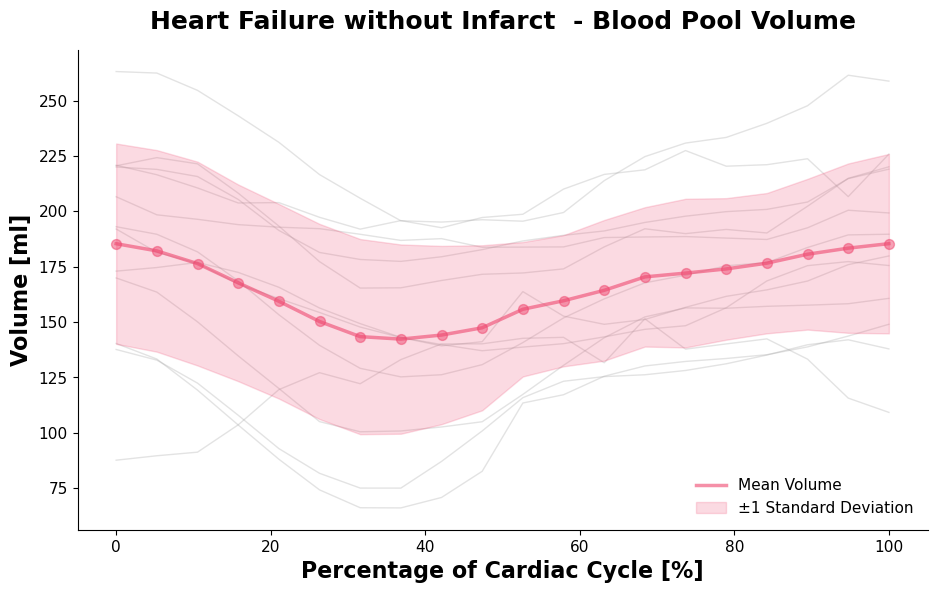

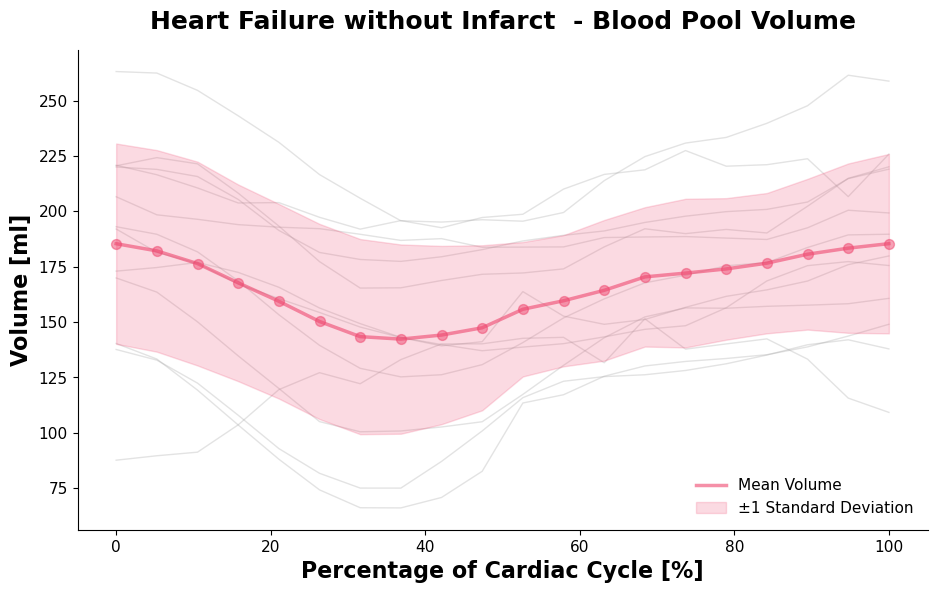

In [55]:
pathology_title = "Heart Failure without Infarct  - Blood Pool Volume"
save_path = "/data.lfpn/ibraun/Code/paper_volume_calculation/Plotting/Generated_Plots/Deformation_cardiac_cycle/Blood_Pool/deform_BP_heart_failure.svg"
volume_plotting(time_norm, vol_array, mean_vol_failure_bp, std_vol_failure_bp, pathology_title,save_path)

save_path = "/data.lfpn/ibraun/Code/paper_volume_calculation/Plotting/Generated_Plots/Deformation_cardiac_cycle/Blood_Pool/deform_BP_heart_failure.pdf"
volume_plotting(time_norm, vol_array, mean_vol_failure_bp, std_vol_failure_bp, pathology_title,save_path)

In [56]:
# i need to interpolate the time stps to common time basis

# Normalized time base (0% to 100% cardiac cycle with 20 points)
time_norm = np.linspace(0, 1, 20)

# Interpolated volumes will be stored here
interpolated_volumes = []

for df in volume_dfs:
    volumes = df['myo_volume'].values
    n = len(volumes)
    time_original = np.linspace(0, 1, n)  # Normalize time for this subject
    f_interp = interp1d(time_original, volumes, kind='linear') #linear interpolation
    volumes_interp = f_interp(time_norm)
    interpolated_volumes.append(volumes_interp)
    
# Stack into array: shape (9, 100)
vol_array = np.vstack(interpolated_volumes)

# Compute mean and std across subjects
mean_vol_failure_myo = np.mean(vol_array, axis=0)
std_vol_failure_myo = np.std(vol_array, axis=0)

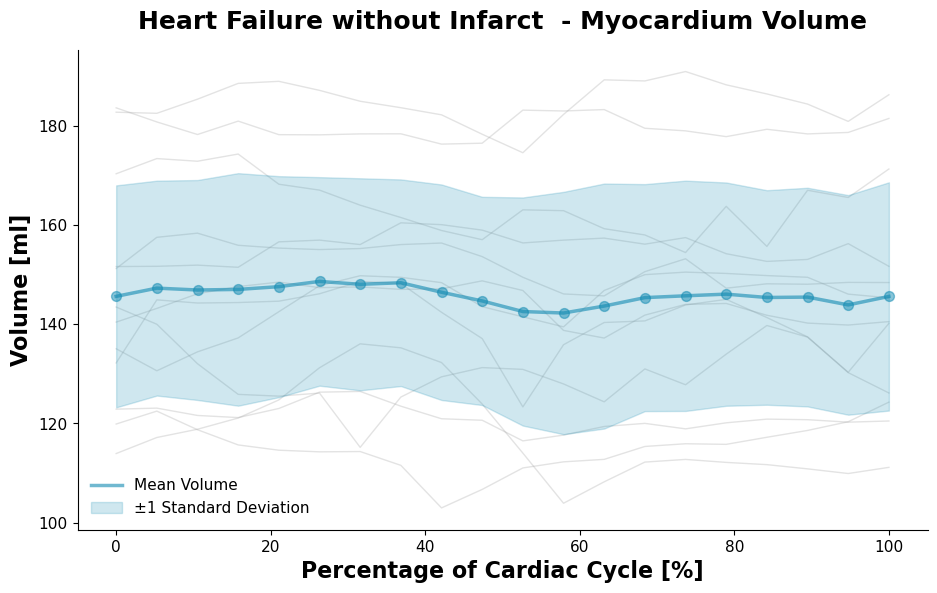

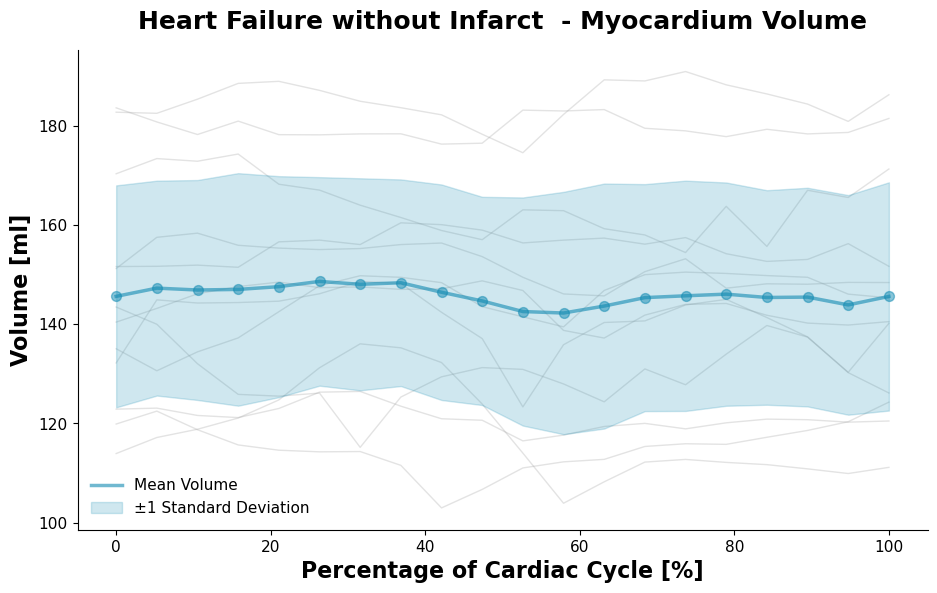

In [57]:
pathology_title = "Heart Failure without Infarct  - Myocardium Volume"
save_path = "/data.lfpn/ibraun/Code/paper_volume_calculation/Plotting/Generated_Plots/Deformation_cardiac_cycle/Myocardium/deform_MYO_heart_failure.svg"
volume_plotting(time_norm, vol_array, mean_vol_failure_myo, std_vol_failure_myo, pathology_title,bp_bool=False, savepath= save_path)

save_path = "/data.lfpn/ibraun/Code/paper_volume_calculation/Plotting/Generated_Plots/Deformation_cardiac_cycle/Myocardium/deform_MYO_heart_failure.pdf"
volume_plotting(time_norm, vol_array, mean_vol_failure_myo, std_vol_failure_myo, pathology_title,bp_bool=False, savepath= save_path)

# Pathology LV Hypertrophy

In [58]:
#import datasets containing volumes for the datasets in the list of one pathology

volume_dfs = []
for dataset in datasets_Lv:
    try:
        file_path = f"/data.lfpn/ibraun/Code/paper_volume_calculation/outputs_patient_data/final_results/{dataset}/mesh_analysis_data/mesh_volumes_cal.csv"
        df = pd.read_csv(file_path)
        volume_dfs.append(df)
    except Exception as e:
        print(f"Error in Dataset {dataset}: {e}")

In [59]:
# i need to interpolate the time stps to common time basis

# Normalized time base (0% to 100% cardiac cycle with 20 points)
time_norm = np.linspace(0, 1, 20)

# Interpolated volumes will be stored here
interpolated_volumes = []

for df in volume_dfs:
    volumes = df['bp_volume'].values
    n = len(volumes)
    time_original = np.linspace(0, 1, n)  # Normalize time for this subject
    f_interp = interp1d(time_original, volumes, kind='linear') #linear interpolation
    volumes_interp = f_interp(time_norm)
    interpolated_volumes.append(volumes_interp)
    
# Stack into array: shape (9, 100)
vol_array = np.vstack(interpolated_volumes)

# Compute mean and std across subjects
mean_vol_hyper_bp = np.mean(vol_array, axis=0)
std_vol_hyper_bp = np.std(vol_array, axis=0)



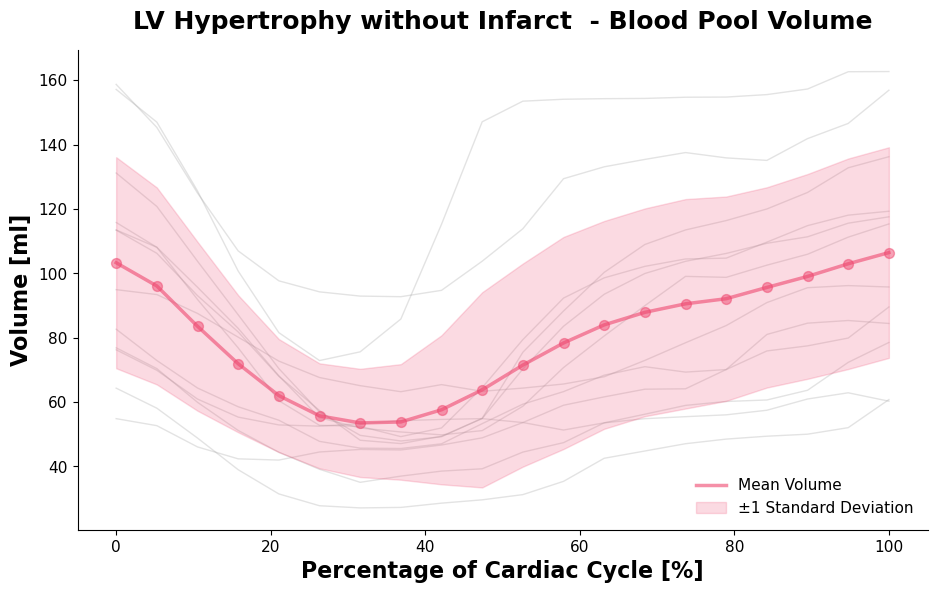

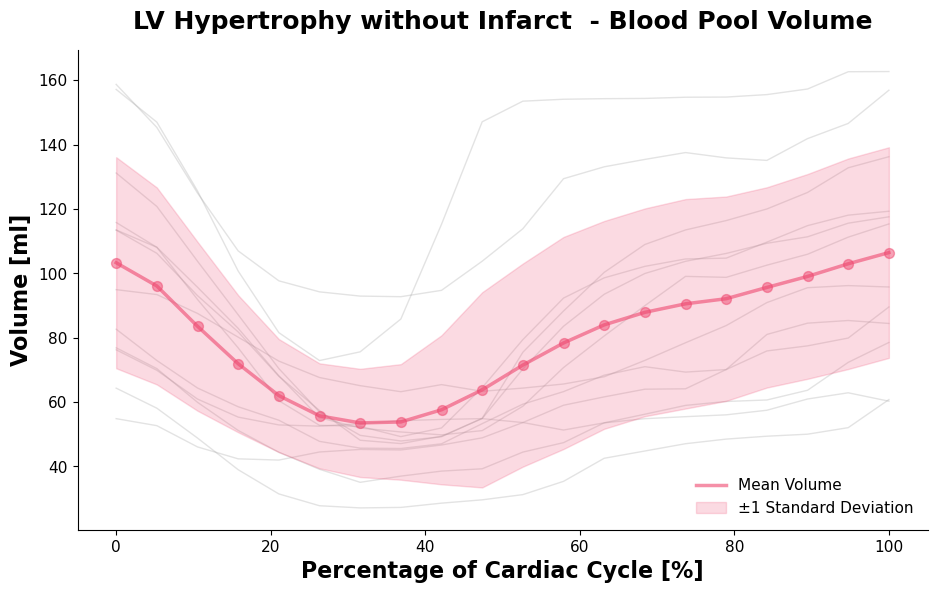

In [60]:
pathology_title = "LV Hypertrophy without Infarct  - Blood Pool Volume"
save_path = "/data.lfpn/ibraun/Code/paper_volume_calculation/Plotting/Generated_Plots/Deformation_cardiac_cycle/Blood_Pool/deform_BP_LV_hypertrophy.svg"
volume_plotting(time_norm, vol_array, mean_vol_hyper_bp, std_vol_hyper_bp, pathology_title,save_path)

save_path = "/data.lfpn/ibraun/Code/paper_volume_calculation/Plotting/Generated_Plots/Deformation_cardiac_cycle/Blood_Pool/deform_BP_LV_hypertrophy.pdf"
volume_plotting(time_norm, vol_array, mean_vol_hyper_bp, std_vol_hyper_bp, pathology_title,save_path)

In [61]:
# i need to interpolate the time stps to common time basis

# Normalized time base (0% to 100% cardiac cycle with 20 points)
time_norm = np.linspace(0, 1, 20)

# Interpolated volumes will be stored here
interpolated_volumes = []

for df in volume_dfs:
    volumes = df['myo_volume'].values
    n = len(volumes)
    time_original = np.linspace(0, 1, n)  # Normalize time for this subject
    f_interp = interp1d(time_original, volumes, kind='linear') #linear interpolation
    volumes_interp = f_interp(time_norm)
    interpolated_volumes.append(volumes_interp)
    
# Stack into array: shape (9, 100)
vol_array = np.vstack(interpolated_volumes)

# Compute mean and std across subjects
mean_vol_hyper_myo = np.mean(vol_array, axis=0)
std_vol_hyper_myo = np.std(vol_array, axis=0)


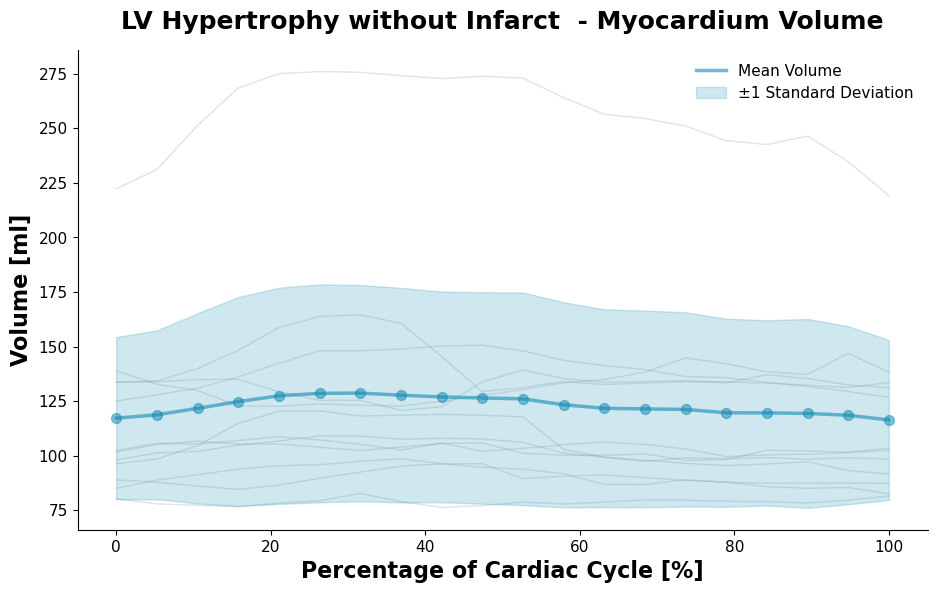

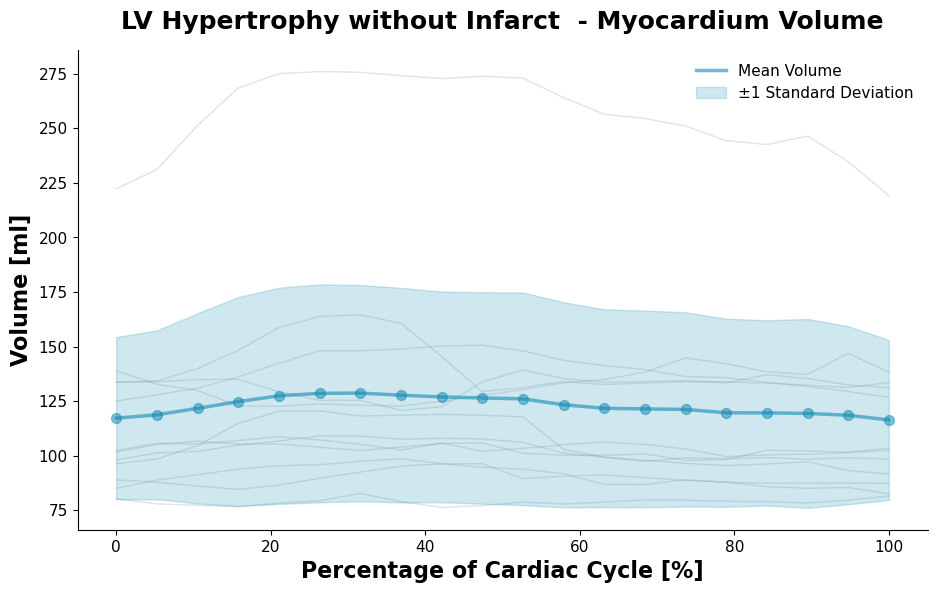

In [62]:
pathology_title = "LV Hypertrophy without Infarct  - Myocardium Volume"
save_path = "/data.lfpn/ibraun/Code/paper_volume_calculation/Plotting/Generated_Plots/Deformation_cardiac_cycle/Myocardium/deform_MYO_LV_hypertrophy.svg"
volume_plotting(time_norm, vol_array, mean_vol_hyper_myo, std_vol_hyper_myo, pathology_title,bp_bool=False, savepath=save_path)

save_path = "/data.lfpn/ibraun/Code/paper_volume_calculation/Plotting/Generated_Plots/Deformation_cardiac_cycle/Myocardium/deform_MYO_LV_hypertrophy.pdf"
volume_plotting(time_norm, vol_array, mean_vol_hyper_myo, std_vol_hyper_myo, pathology_title,bp_bool=False, savepath=save_path)

## Plot all pathologies together in one plot

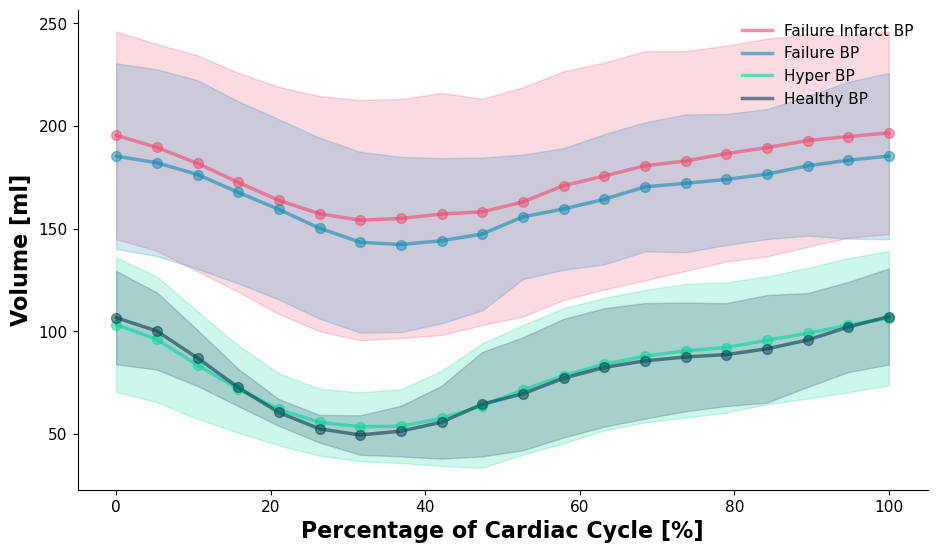

In [70]:
# Example time vector (normalized cardiac cycle)
time_norm = np.linspace(0, 1, len(mean_vol_healthy_bp))  # should match your data length

# Colors for the four pathologies
colors = {
'failure': '#118ab2ff',      # Modern blue
'failure_infarct': '#ef476fff',  # JAHA red
'hyper': "#06d6a0ff",      # matching green that also colorblind people can differentiate
'healthy': "#073b4cff"   # grey
}

fig, ax = plt.subplots(figsize=(10,6), dpi=100)

# --- Failure Infarct BP ---
ax.plot(time_norm * 100, mean_vol_failure_infarct_bp,
        color=colors['failure_infarct'], linewidth=2.5, label='Failure Infarct BP', alpha=0.6, zorder=3)
ax.scatter(time_norm * 100, mean_vol_failure_infarct_bp,
           color=colors['failure_infarct'], s=50, alpha=0.5, linewidth=1, zorder=4)
ax.fill_between(time_norm * 100, 
                mean_vol_failure_infarct_bp - std_vol_failure_infarct_bp, 
                mean_vol_failure_infarct_bp + std_vol_failure_infarct_bp,
                color=colors['failure_infarct'], alpha=0.2, zorder=2)

# --- Failure BP ---
ax.plot(time_norm * 100, mean_vol_failure_bp,
        color=colors['failure'], linewidth=2.5, label='Failure BP', alpha=0.6, zorder=3)
ax.scatter(time_norm * 100, mean_vol_failure_bp,
           color=colors['failure'], s=50, alpha=0.5, linewidth=1, zorder=4)
ax.fill_between(time_norm * 100, 
                mean_vol_failure_bp - std_vol_failure_bp, 
                mean_vol_failure_bp + std_vol_failure_bp,
                color=colors['failure'], alpha=0.2, zorder=2)

# --- Hyper BP ---
ax.plot(time_norm * 100, mean_vol_hyper_bp,
        color=colors['hyper'], linewidth=2.5, label='Hyper BP', alpha=0.6, zorder=3)
ax.scatter(time_norm * 100, mean_vol_hyper_bp,
           color=colors['hyper'], s=50, alpha=0.5, linewidth=1, zorder=4)
ax.fill_between(time_norm * 100, 
                mean_vol_hyper_bp - std_vol_hyper_bp, 
                mean_vol_hyper_bp + std_vol_hyper_bp,
                color=colors['hyper'], alpha=0.2, zorder=2)

# --- Healthy BP ---
ax.plot(time_norm * 100, mean_vol_healthy_bp,
        color=colors['healthy'], linewidth=2.5, label='Healthy BP', alpha=0.6, zorder=3)
ax.scatter(time_norm * 100, mean_vol_healthy_bp,
           color=colors['healthy'], s=50, alpha=0.5, linewidth=1, zorder=4)
ax.fill_between(time_norm * 100, 
                mean_vol_healthy_bp - std_vol_healthy_bp, 
                mean_vol_healthy_bp + std_vol_healthy_bp,
                color=colors['healthy'], alpha=0.2, zorder=2)

# --- Styling (same as your reference) ---
ax.set_xlabel('Percentage of Cardiac Cycle [%]', fontsize=16, fontweight='bold', color='#000000')
ax.set_ylabel('Volume [ml]', fontsize=16, fontweight='bold', color='#000000')
ax.tick_params(axis='both', which='major', labelsize=11, colors='#000000')
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#000000')
ax.spines['bottom'].set_color('#000000')
ax.set_facecolor('#FFFFFF')

legend = ax.legend(loc='best', frameon=False, fontsize=11, title_fontsize=12)
legend.get_title().set_fontweight('bold')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.95, top=0.9)

plt.savefig("/data.lfpn/ibraun/Code/paper_volume_calculation/Graphics/defromation_cardiac_cycle.pdf",dpi=300)
plt.savefig("/data.lfpn/ibraun/Code/paper_volume_calculation/Graphics/defromation_cardiac_cycle.svg")

plt.show()

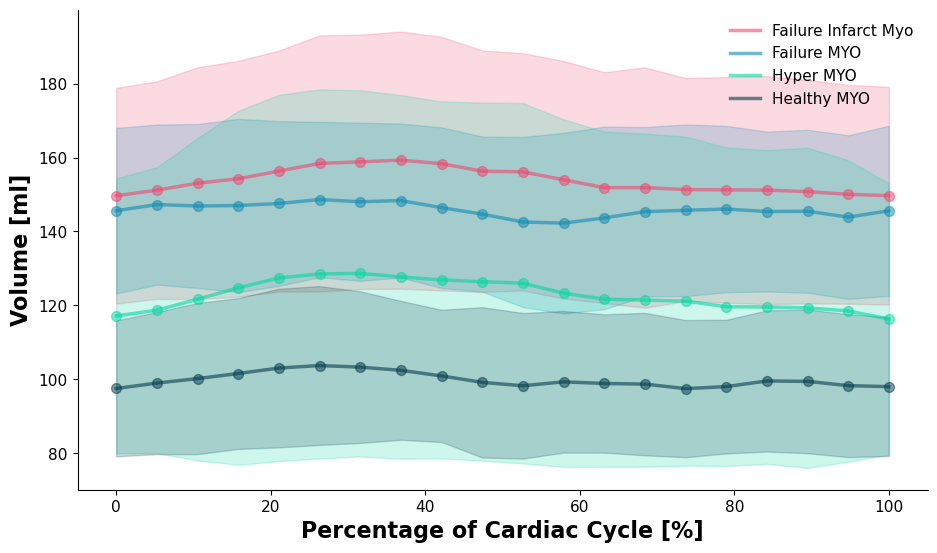

In [68]:
# Example time vector (normalized cardiac cycle)
time_norm = np.linspace(0, 1, len(mean_vol_healthy_myo))  # should match your data length

# Colors for the four pathologies
colors = {
'failure': '#118ab2ff',      # Modern blue
'failure_infarct': '#ef476fff',  # JAHA red
'hyper': "#06d6a0ff",      # matching green that also colorblind people can differentiate
'healthy': "#073b4cff"   # grey
}

fig, ax = plt.subplots(figsize=(10,6), dpi=100)

# --- Failure Infarct Myo ---
ax.plot(time_norm * 100, mean_vol_failure_infarct_myo,
        color=colors['failure_infarct'], linewidth=2.5, label='Failure Infarct Myo', alpha=0.6, zorder=3)
ax.scatter(time_norm * 100, mean_vol_failure_infarct_myo,
           color=colors['failure_infarct'], s=50, alpha=0.5, linewidth=1, zorder=4)
ax.fill_between(time_norm * 100, 
                mean_vol_failure_infarct_myo - std_vol_failure_infarct_myo, 
                mean_vol_failure_infarct_myo + std_vol_failure_infarct_myo,
                color=colors['failure_infarct'], alpha=0.2, zorder=2)

# --- Failure Myo ---
ax.plot(time_norm * 100, mean_vol_failure_myo,
        color=colors['failure'], linewidth=2.5, label='Failure MYO', alpha=0.6, zorder=3)
ax.scatter(time_norm * 100, mean_vol_failure_myo,
           color=colors['failure'], s=50, alpha=0.5, linewidth=1, zorder=4)
ax.fill_between(time_norm * 100, 
                mean_vol_failure_myo - std_vol_failure_myo, 
                mean_vol_failure_myo + std_vol_failure_myo,
                color=colors['failure'], alpha=0.2, zorder=2)

# --- Hyper Myo ---
ax.plot(time_norm * 100, mean_vol_hyper_myo,
        color=colors['hyper'], linewidth=2.5, label='Hyper MYO', alpha=0.6, zorder=3)
ax.scatter(time_norm * 100, mean_vol_hyper_myo,
           color=colors['hyper'], s=50, alpha=0.5, linewidth=1, zorder=4)
ax.fill_between(time_norm * 100, 
                mean_vol_hyper_myo - std_vol_hyper_myo, 
                mean_vol_hyper_myo + std_vol_hyper_myo,
                color=colors['hyper'], alpha=0.2, zorder=2)

# --- Healthy Myo ---
ax.plot(time_norm * 100, mean_vol_healthy_myo,
        color=colors['healthy'], linewidth=2.5, label='Healthy MYO', alpha=0.6, zorder=3)
ax.scatter(time_norm * 100, mean_vol_healthy_myo,
           color=colors['healthy'], s=50, alpha=0.5, linewidth=1, zorder=4)
ax.fill_between(time_norm * 100, 
                mean_vol_healthy_myo - std_vol_healthy_myo, 
                mean_vol_healthy_myo + std_vol_healthy_myo,
                color=colors['healthy'], alpha=0.2, zorder=2)

# --- Styling (same as your reference) ---
ax.set_xlabel('Percentage of Cardiac Cycle [%]', fontsize=16, fontweight='bold', color='#000000')
ax.set_ylabel('Volume [ml]', fontsize=16, fontweight='bold', color='#000000')
ax.tick_params(axis='both', which='major', labelsize=11, colors='#000000')
ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#000000')
ax.spines['bottom'].set_color('#000000')
ax.set_facecolor('#FFFFFF')

legend = ax.legend(loc='best', frameon=False, fontsize=11, title_fontsize=12)
legend.get_title().set_fontweight('bold')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.95, top=0.9)

plt.savefig("/data.lfpn/ibraun/Code/paper_volume_calculation/Graphics/Myo_defromation_cardiac_cycle.pdf",dpi=300)
plt.savefig("/data.lfpn/ibraun/Code/paper_volume_calculation/Graphics/Myo_defromation_cardiac_cycle.svg")

plt.show()